# Task
## Digit Recognizer competition-kaggle.
* Link:*https://www.kaggle.com/competitions/digit-recognizer**

#### Download dataset

In [1]:
import opendatasets as od

od.download("https://www.kaggle.com/competitions/digit-recognizer/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: edd1eo
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15.3M/15.3M [00:10<00:00, 1.50MB/s]



Extracting archive .\digit-recognizer/digit-recognizer.zip to .\digit-recognizer


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [2]:
# Training set
train = pd.read_csv("digit-recognizer/train.csv")

# Test set
test = pd.read_csv("digit-recognizer/test.csv")


train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [3]:
y = train['label'].astype('float32')
x = train.drop(['label'],axis = 1).astype('int32')
test_x = test.astype('float32')

x.shape, y.shape, test_x.shape

((42000, 784), (42000,), (28000, 784))

In [73]:
x.shape, test_x.shape, y.shape

((42000, 784), (28000, 784), (42000,))

D:\Courses\machine_learning\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

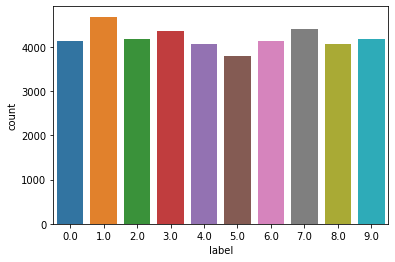

In [74]:
import seaborn as sns

sns.countplot(y,label='count',)

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform'),
    "KNN(3)"       : KNeighborsClassifier(), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "LogisticRegr" : LogisticRegression()
}

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# # Start timing the models above
# from time import time
# nfast = 14      # Don't run the very slow ones
# head = list(classifiers.items())[:nfast]

# for name, classifier in head:
#     start = time()
#     classifier.fit(X_train, y_train)
#     train_time = time() - start
#     start = time()
#     score = classifier.score(X_test, y_test)
#     score_time = time()-start
#     print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))
#     print("Analysis complete!")

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [4,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

Fitting 3 folds for each of 42 candidates, totalling 126 fits


KeyboardInterrupt: 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [10]:
from sklearn.metrics import classification_report,accuracy_score

y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       816
         1.0       0.96      1.00      0.98       909
         2.0       0.99      0.95      0.97       846
         3.0       0.97      0.96      0.96       937
         4.0       0.99      0.97      0.98       839
         5.0       0.96      0.97      0.96       702
         6.0       0.97      0.99      0.98       785
         7.0       0.96      0.97      0.96       893
         8.0       0.98      0.94      0.96       835
         9.0       0.95      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [12]:
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(x, y)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [21]:
results = clf.predict(test_x)

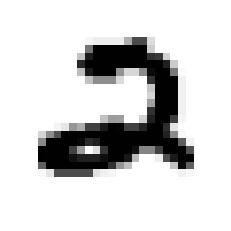

In [26]:
some_digit=np.array(test_x.iloc[0])
normal = some_digit.reshape(28, 28)

plt.imshow(normal, cmap="binary")
plt.axis("off")
plt.show()

In [43]:
results.dtype()

TypeError: 'numpy.dtype[float32]' object is not callable

In [50]:
submission = pd.DataFrame({'ImageId' : [i+1 for i in range(len(results))] , 'Label' : results.astype('int')})

submission.head(), submission.tail()

(   ImageId  Label
 0        1      2
 1        2      0
 2        3      9
 3        4      9
 4        5      3,
        ImageId  Label
 27995    27996      9
 27996    27997      7
 27997    27998      3
 27998    27999      9
 27999    28000      2)

In [52]:
submission.to_csv('submission.csv', index=False)

In [53]:
results[10]

5.0

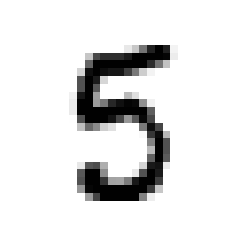

In [54]:
some_digit=np.array(test_x.iloc[10])
normal = some_digit.reshape(28, 28)

plt.imshow(normal, cmap="binary")
plt.axis("off")
plt.show()

In [55]:
# Test set
f = pd.read_csv("submission.csv")


f.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [56]:
display(submission.dtypes)

ImageId    int64
Label      int32
dtype: object

In [45]:
# converting 'Weight' from float to int
submission['Label'] = submission['Label'].astype('int')

In [48]:
display(submission.dtypes)

ImageId    int64
Label      int32
dtype: object

In [49]:
f = pd.read_csv("submission.csv")
f.tail()

,ImageId,Label
27995,27996,9.0
27996,27997,7.0
27997,27998,3.0
27998,27999,9.0
27999,28000,2.0


In [ ]:
submission.to_csv('submission.csv', index=False)